# Breadth First Search in Python

A quick example using NetworkX to implement a basic graph algorithm.

Allen B. Downey

[MIT License](https://opensource.org/licenses/MIT)

In [1]:
# this future import makes the code compatible with Python 2 and 3
from __future__ import print_function, division

%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from collections import deque
from networkx import DiGraph

import seaborn as sns
COLORS = sns.color_palette()

In [2]:
def bfs(G, start):
    """A simple version of BFS that just computes distances.
    
    G: Graph
    start: int start node
    
    returns: map from node to distance
    """
    dist = {start: 0}
    queue = deque([start])
    while queue:
        node = queue.popleft()         
        for child in G.neighbors(node):
            if child not in dist:                    
                dist[child] = dist[node] + 1
                queue.append(child)
    return dist

In [3]:
def bfs(G, start):
    """A simple version of BFS that computes distances and
        paths back to start.
    
    G: Graph
    start: int start node
    
    returns: (map from node to distance,
        DiGraph containing paths from each node back to start)
    """
    dist = {start: 0}
    tree = DiGraph()
    queue = deque([start])
    while queue:
        node = queue.popleft()         
        for child in G.neighbors(node):
            if child not in dist:                    
                dist[child] = dist[node] + 1
                tree.add_edge(child, node) 
                queue.append(child)
    return dist, tree

In [4]:
from numpy.random import random

def flip(p):
    return random() < p

In [5]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

In [6]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [7]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

10

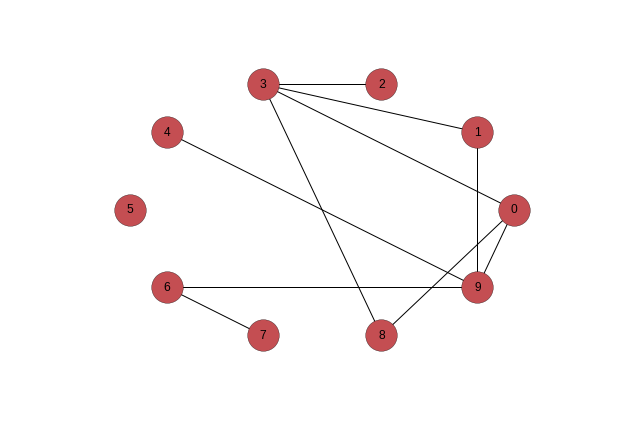

In [8]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

In [9]:
dist, tree = bfs(random_graph, 0)
dist

{0: 0, 1: 2, 2: 2, 3: 1, 4: 2, 6: 2, 7: 3, 8: 1, 9: 1}

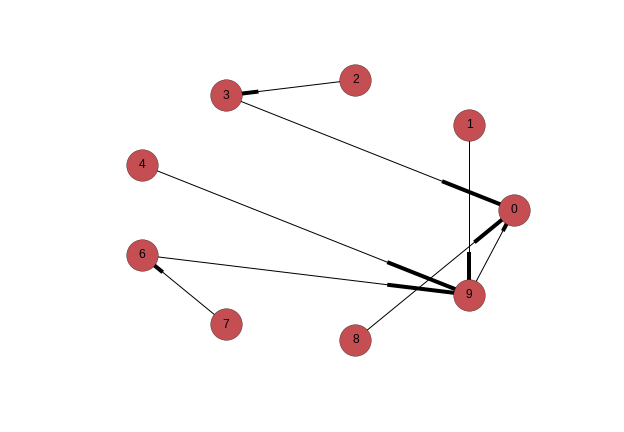

In [10]:
nx.draw_circular(tree, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

In [11]:
def fft(ys):
    N = len(ys)
    if N == 1:
        return ys
    
    He = fft(ys[::2])
    Ho = fft(ys[1::2])
    
    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)
    
    return np.tile(He, 2) + W * np.tile(Ho, 2)